## Кодування та компресія

## Завдання:

1. Напишіть код для стиснення зображення з використанням алгоритму JPEG.
2. Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.
3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

## Розв'язок

In [1]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

### 1.	Стиснення зображення з використанням алгоритму JPEG

Розмір файлу: 141271 байт
Розмір зображення: (1200, 675)


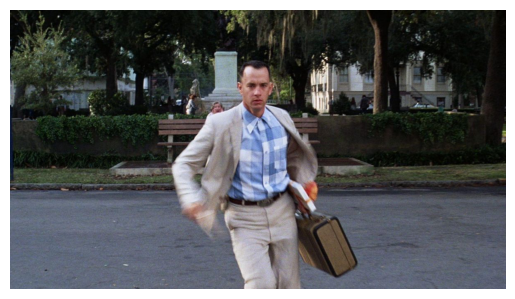

In [2]:
# Відкриття зображення
image = Image.open('FG.jpg')
print(f"Розмір файлу: {os.path.getsize('FG.jpg')} байт")
print(f"Розмір зображення: {image.size}")
plt.axis('off')
plt.imshow(image);

In [3]:
# Збереження зображення у форматі JPEG з певними параметрами стиснення

image.save('compressed_FG.jpg', format='JPEG', quality=20, optimize=True)

# Параметр quality визначає якість стиснення від 0 (максимально стиснене) до 100 (максимально якісне), 
# і параметр optimize вказує, чи потрібно використовувати оптимізацію при стисненні.

Розмір файлу: 33212 байт
Розмір зображення: (1200, 675)


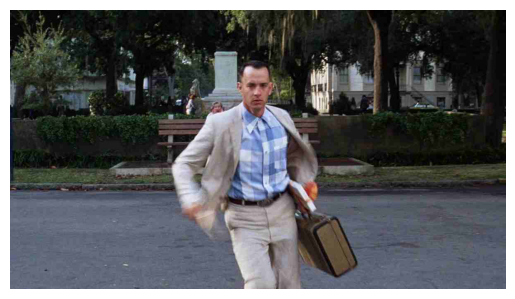

In [4]:
# Виводимо стиснене зображення
img = Image.open('compressed_FG.jpg')
print(f"Розмір файлу: {os.path.getsize('compressed_FG.jpg')} байт")
print(f"Розмір зображення: {img.size}")
plt.axis('off')
plt.imshow(img);

### 2.	 Стиснення текстового файлу з використанням бібліотеки gzip

In [5]:
import gzip

In [6]:
# Відкриваємо файл, який ми хочемо стиснути, для читання в текстовому режимі
with open('TOM_HANKS.txt', 'rt') as file_in:
    # Відкриваємо файл, у який буде записано стиснутий текст
    with gzip.open('compressed_recipe.gz', 'wt') as file_out:
        # Стиснутий текст буде записуватися в файл 'compressed_recipe.gz'
        file_out.writelines(file_in)

print('File compression complete.')

File compression complete.


In [7]:
print(f"Розмір початкового файлу: {os.path.getsize('TOM_HANKS.txt')} байт")
print(f"Розмір стисненого файлу: {os.path.getsize('compressed_TOM_HANKS.gz')} байт")

Розмір початкового файлу: 660 байт
Розмір стисненого файлу: 436 байт


### 3. Стиснення та розпакування текстового файлу за допомогою алгоритму Хаффмана

In [8]:
# Node of a Huffman Tree  
class Nodes:  
    def __init__(self, probability, symbol, left = None, right = None):  
        # probability of the symbol  
        self.probability = probability  
  
        # the symbol  
        self.symbol = symbol  
  
        # the left node  
        self.left = left  
  
        # the right node  
        self.right = right  
  
        # the tree direction (0 or 1)  
        self.code = ''  
  
""" A supporting function in order to calculate the probabilities of symbols in specified data """  
def CalculateProbability(the_data):  
    the_symbols = dict()  
    for item in the_data:  
        if the_symbols.get(item) == None:  
            the_symbols[item] = 1  
        else:   
            the_symbols[item] += 1       
    return the_symbols  
  
""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """  
the_codes = dict()  
  
def CalculateCodes(node, value = ''):  
    # a huffman code for current node  
    newValue = value + str(node.code)  
  
    if(node.left):  
        CalculateCodes(node.left, newValue)  
    if(node.right):  
        CalculateCodes(node.right, newValue)  
  
    if(not node.left and not node.right):  
        the_codes[node.symbol] = newValue  
           
    return the_codes  
  
""" A supporting function in order to get the encoded result """  
def OutputEncoded(the_data, coding):  
    encodingOutput = []  
    for element in the_data:  
        # print(coding[element], end = '')  
        encodingOutput.append(coding[element])  
          
    the_string = ''.join([str(item) for item in encodingOutput])      
    return the_string  
          
""" A supporting function in order to calculate the space difference between compressed and non compressed data"""      
def TotalGain(the_data, coding):  
    # total bit space to store the data before compression  
    beforeCompression = len(the_data) * 8  
    afterCompression = 0  
    the_symbols = coding.keys()  
    for symbol in the_symbols:  
        the_count = the_data.count(symbol)  
        # calculating how many bit is required for that symbol in total  
        afterCompression += the_count * len(coding[symbol])  
    print("Space usage before compression (in bits):", beforeCompression)  
    print("Space usage after compression (in bits):",  afterCompression)  
  
def HuffmanEncoding(the_data):  
    symbolWithProbs = CalculateProbability(the_data)  
    the_symbols = symbolWithProbs.keys()  
    the_probabilities = symbolWithProbs.values()  
    print("symbols: ", the_symbols)  
    print("probabilities: ", the_probabilities)  
      
    the_nodes = []  
      
    # converting symbols and probabilities into huffman tree nodes  
    for symbol in the_symbols:  
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))  
      
    while len(the_nodes) > 1:  
        # sorting all the nodes in ascending order based on their probability  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)  
        # for node in nodes:    
        #      print(node.symbol, node.prob)  
      
        # picking two smallest nodes  
        right = the_nodes[0]  
        left = the_nodes[1]  
      
        left.code = 0  
        right.code = 1  
      
        # combining the 2 smallest nodes to create new node  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)  
      
        the_nodes.remove(left)  
        the_nodes.remove(right)  
        the_nodes.append(newNode)  
              
    huffmanEncoding = CalculateCodes(the_nodes[0])  
    print("symbols with codes", huffmanEncoding)  
    TotalGain(the_data, huffmanEncoding)  
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)  
    return encodedOutput, the_nodes[0]  
   
def HuffmanDecoding(encodedData, huffmanTree):  
    treeHead = huffmanTree  
    decodedOutput = []  
    for x in encodedData:  
        if x == '1':  
            huffmanTree = huffmanTree.right     
        elif x == '0':  
            huffmanTree = huffmanTree.left  
        try:  
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:  
                pass  
        except AttributeError:  
            decodedOutput.append(huffmanTree.symbol)  
            huffmanTree = treeHead  
          
    string = ''.join([str(item) for item in decodedOutput])  
    return string  

#### Перевіримо процес кодування/декодування на простому тексті

In [9]:
the_data = "My name is forrest gump!"  
print(the_data)  
encoding, the_tree = HuffmanEncoding(the_data)  
print('Encoded output: ', encoding)  
print('Decoded Output: ', HuffmanDecoding(encoding, the_tree))  

My name is forrest gump!
symbols:  dict_keys(['M', 'y', ' ', 'n', 'a', 'm', 'e', 'i', 's', 'f', 'o', 'r', 't', 'g', 'u', 'p', '!'])
probabilities:  dict_values([1, 1, 4, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1])
symbols with codes {'a': '00000', 'n': '00001', 'y': '00010', 'M': '00011', 'r': '0010', 's': '0011', 'e': '0100', 'm': '0101', ' ': '011', '!': '1000', 'p': '1001', 'u': '1010', 'g': '1011', 't': '1100', 'o': '1101', 'f': '1110', 'i': '1111'}
Space usage before compression (in bits): 192
Space usage after compression (in bits): 96
Encoded output:  000110001001100001000000101010001111110011011111011010010001001000011110001110111010010110011000
Decoded Output:  My name is forrest gump!


#### Застосуємо цей алгоритм до данних з текстового файлу

In [10]:
file = 'TOM_HANKS.txt'
with open(file, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()

In [11]:
# Дані з текстового файлу
text

"Thomas Jeffrey Hanks (born July 9, 1956) is an American actor and filmmaker. Known for both his comedic and dramatic roles, he is one of the most popular and recognizable film stars worldwide, and is regarded as an American cultural icon. Hanks' films have grossed more than $4.9 billion in North America and more than $9.96 billion worldwide, making him the fourth-highest-grossing actor in North America. He has received numerous honors including the AFI Life Achievement Award in 2002, the Kennedy Center Honor in 2014, the Presidential Medal of Freedom and the French Legion of Honor both in 2016, as well as the Golden Globe Cecil B. DeMille Award in 2020"

In [12]:
# Проводимо кодування тексту
encoding, the_tree = HuffmanEncoding(text) 

symbols:  dict_keys(['T', 'h', 'o', 'm', 'a', 's', ' ', 'J', 'e', 'f', 'r', 'y', 'H', 'n', 'k', '(', 'b', 'u', 'l', '9', ',', '1', '5', '6', ')', 'i', 'A', 'c', 't', 'd', '.', 'K', 'w', 'p', 'g', 'z', "'", 'v', '$', '4', 'N', '-', 'F', 'I', 'L', '2', '0', 'C', 'P', 'M', 'G', 'B', 'D'])
probabilities:  dict_values([1, 25, 40, 19, 37, 24, 110, 2, 55, 11, 38, 3, 5, 44, 4, 1, 7, 8, 25, 5, 7, 3, 1, 3, 1, 41, 8, 17, 24, 24, 6, 2, 8, 2, 9, 1, 1, 3, 2, 2, 2, 2, 3, 1, 2, 6, 6, 2, 1, 2, 2, 1, 1])
symbols with codes {'a': '1010', 'n': '0110', 'y': '00111001', 'M': '11001010', 'r': '1001', 's': '01010', 'e': '111', 'm': '10110', ' ': '000', '!': '1000', 'p': '11010001', 'u': '110111', 'g': '101110', 't': '01001', 'o': '1000', 'f': '010110', 'i': '0111', 'k': '00100000', 'F': '00100001', ',': '0010001', 'b': '0010010', 'v': '00100110', '6': '00100111', 'l': '00101', 'h': '00110', '1': '00111000', '0': '0011101', '2': '0011110', '.': '0011111', 'd': '01000', '9': '0101110', 'H': '0101111', 'D': '101

In [13]:
# Закодовані данні
encoding

'110010001001101000101101010010100001101001111101011001011010011110011100100001011111010011000100000010100001100100000010010100010010110000110100111101110010100111001000010111000100010000011100001011101011111110010011110111111000001110101000010100110000110110101101111001011111000101001100001010110000100110001001000101001100100000001011001110010110110101101010001000001111001001111100011010010011010001101010110000010110100010010000010010100001001001100000011001110101000011000100010110111010000111110000001010011001000000010001001101010110101001001011111000000100110000010111101010001000100000110111000011101010000100001101110001000010110000010010011011100010110100001010010010001101000110001101000111011100101101010010001010011001000000100111111000100010111001100111101111101101000100100010111100001011001110010110110000010100100110101001010100001101011000100100101010001101010111010001110010001000101001100100000001110101000010011111011101010100101000111010000001010010100001010011000011011010110

In [14]:
# Зберігаємо закодовані дані в файл
filename, file_extension = os.path.splitext(file)
output_path = filename + "_compressed" + ".bin"
with open(output_path, 'w') as output:
    output.write(encoding)

In [15]:
# Зчитуємо дані із закодованого файлу та декодуємо їх
with open(output_path, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()
     text = HuffmanDecoding(text, the_tree)
text

"Thomas Jeffrey Hanks (born July 9, 1956) is an American actor and filmmaker. Known for both his comedic and dramatic roles, he is one of the most popular and recognizable film stars worldwide, and is regarded as an American cultural icon. Hanks' films have grossed more than $4.9 billion in North America and more than $9.96 billion worldwide, making him the fourth-highest-grossing actor in North America. He has received numerous honors including the AFI Life Achievement Award in 2002, the Kennedy Center Honor in 2014, the Presidential Medal of Freedom and the French Legion of Honor both in 2016, as well as the Golden Globe Cecil B. DeMille Award in 2020"